Storytelling with data: https://www.youtube.com/watch?v=st7_vPjq0SU

In [67]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

outpath = os.getcwd() + "\\images"

In [3]:
raw_df = pd.read_excel('Warehouse.xlsx')
raw_df

,Warehouse ID,Location,Errors,Accuracy,Null,Grand Total,Error rate,Accuracy rate,Null.1,Total
0,1,South,80,691,32,803,0.10,0.86,0.04,1
1,2,Northeast,121,692,52,865,0.14,0.80,0.06,1
2,3,Northeast,80,668,48,795,0.10,0.84,0.06,1
3,4,Northeast,96,560,27,683,0.14,0.82,0.04,1
4,5,Northeast,57,487,23,566,0.10,0.86,0.04,1
5,6,Northeast,94,469,23,586,0.16,0.80,0.04,1
6,7,West,77,408,26,510,0.15,0.80,0.05,1
7,8,South,26,405,4,436,0.06,0.93,0.01,1
8,9,West,46,368,4,418,0.11,0.88,0.01,1
9,10,Northeast,25,317,22,364,0.07,0.87,0.06,1


In [4]:
raw_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Warehouse ID   19 non-null     int64  
 1   Location       19 non-null     object 
 2   Errors         19 non-null     int64  
 3   Accuracy       19 non-null     int64  
 4   Null           19 non-null     int64  
 5   Grand Total    19 non-null     int64  
 6   Error rate     19 non-null     float64
 7   Accuracy rate  19 non-null     float64
 8   Null.1         19 non-null     float64
 9   Total          19 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.7 KB


In [205]:
def prep_data(_df):
    red_error_color = '#FF0000'
    error_gray_color = 'whitesmoke'
    
    def clean_columns(cols):
        return cols.replace(' ','_').replace('Null.1','null_pct').lower()
    
    tmp_df=(_df
            .drop(columns = ['Null'])
            .rename(columns=clean_columns)
            .drop(columns = ['errors', 'accuracy', 'grand_total', 'total'])
            .assign(checkTotal_pct = lambda df: df[['error_rate','accuracy_rate','null_pct']].sum(axis = 1),
                    null_lt_mean_color = lambda df:  np.where(df['error_rate']<df.error_rate.mean(), error_gray_color, red_error_color),
            )
            .sort_values('error_rate')
    )
    
    meanValuesList = (tmp_df[['error_rate', 'accuracy_rate', 'null_pct']]
                      .mean()
                      .round(decimals=2)
                      .to_list())
    
    append_ALL = pd.DataFrame({'warehouse_id':['ALL'], 
                               'location':['ALL'], 
                               'error_rate':[meanValuesList[0]], 
                               'accuracy_rate':[meanValuesList[1]],
                               'null_pct':[meanValuesList[2]],
                               'checkTotal_pct':[0],
                               'null_lt_mean_color':['blue']})
    
    df = pd.concat([tmp_df,append_ALL])
    return df.sort_values(['error_rate','warehouse_id'])


In [171]:
meanError_rate

0.10421052631578949

In [177]:
meanError_rate = df.error_rate.mean()
meanAccuracy_rate = df.accuracy_rate.mean()
meanNull_pct = df.null_pct.mean()

pd.DataFrame({'warehouse_id':['ALL'], 
              'location':['ALL'], 
              'error_rate':[round(df.error_rate.mean(),2)], 
              'accuracy_rate':[round(df.accuracy_rate.mean(),2)],
              'null_pct':[round(df.null_pct.mean(),2)],
              'checkTotal_pct':[0],
              'null_lt_mean_color':['blue']
             }
    )

,warehouse_id,location,error_rate,accuracy_rate,null_pct,checkTotal_pct,null_lt_mean_color
0,ALL,ALL,0.1,0.86,0.04,0,blue


In [206]:
df = prep_data(raw_df)
df.head(20)

,warehouse_id,location,error_rate,accuracy_rate,null_pct,checkTotal_pct,null_lt_mean_color
13,14,Midwest,0.04,0.94,0.02,1.0,whitesmoke
7,8,South,0.06,0.93,0.01,1.0,whitesmoke
9,10,Northeast,0.07,0.87,0.06,1.0,whitesmoke
16,17,Northeast,0.07,0.89,0.04,1.0,whitesmoke
18,19,South,0.07,0.91,0.02,1.0,whitesmoke
12,13,Northeast,0.08,0.83,0.09,1.0,whitesmoke
0,1,South,0.10,0.86,0.04,1.0,whitesmoke
2,3,Northeast,0.10,0.84,0.06,1.0,whitesmoke
4,5,Northeast,0.10,0.86,0.04,1.0,whitesmoke
17,18,South,0.10,0.88,0.02,1.0,whitesmoke


In [187]:
df[['error_rate', 'accuracy_rate', 'null_pct']].mean().round(decimals=2).to_list()

[0.1, 0.86, 0.04]

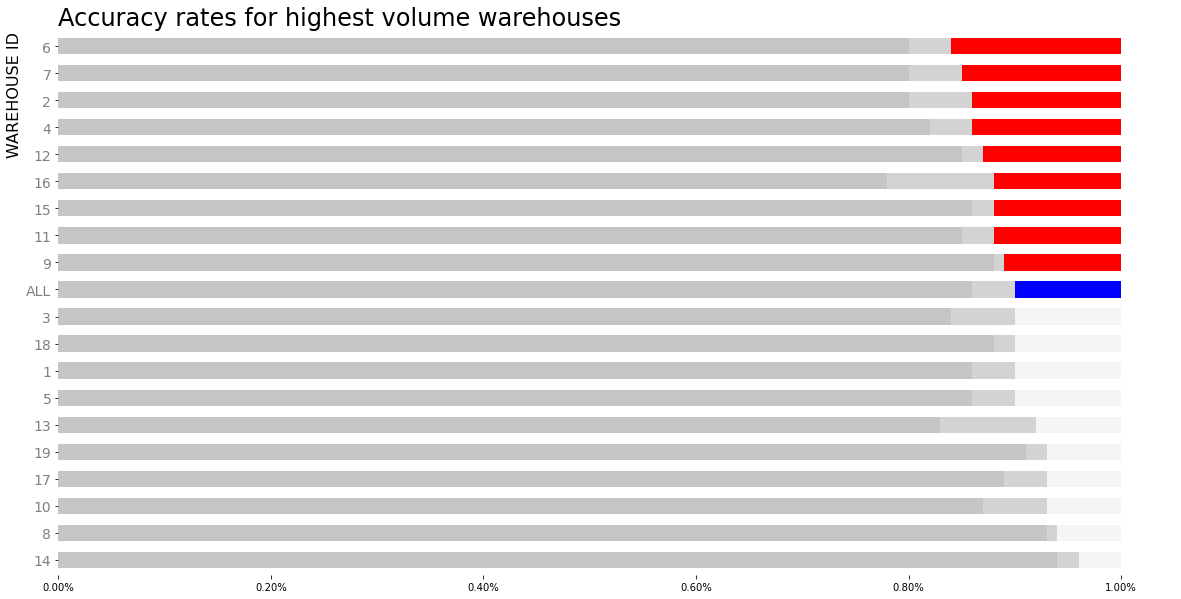

In [200]:
labels = {'size':14, 'color':'gray'}
red_error_color = '#FF0000'
bar_width = .6

import matplotlib.ticker as mtick




fig, ax = plt.subplots(figsize=(20,10))

df.plot.barh(x='warehouse_id', y='accuracy_rate', label='Accuracy Rate', ax=ax, color='#C5C5C5',  width = bar_width)
df.plot.barh(x='warehouse_id', y='null_pct', label='Null Rate', ax=ax, left = df.accuracy_rate, color='lightgrey',  width = bar_width)
df.plot.barh(x='warehouse_id', y='error_rate', label='Error Rate', ax=ax, left = df.accuracy_rate + df.null_pct, color = df.null_lt_mean_color.to_list(), width = bar_width)



ax.set_title('Accuracy rates for highest volume warehouses', loc='left', fontdict={'fontsize':24})
ax.get_legend().remove()
ax.set_ylabel('WAREHOUSE ID', fontdict = {'size':16}, loc='top')
ax.set_yticklabels(ax.get_yticklabels(), fontdict=labels)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

spines = ['left', 'right', 'bottom', 'top']
for line in spines:
    ax.spines[line].set_visible(False)